<a href="https://colab.research.google.com/github/Anu0517/Spam-Email-Classifier-/blob/main/spam_email_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Requritments
!pip install scikit-learn pandas numpy PyPDF2 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.9 MB/s eta 0:00:00


In [ ]:
# Importing
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
# Loading the dataset
data = pd.read_csv('combined_data.csv', encoding='latin-1')

print(data.head())

   label                                               text
0      1  ounce feather bowl hummingbird opec moment ala...
1      1  wulvob get your medircations online qnb ikud v...
2      0   computer connection from cnn com wednesday es...
3      1  university degree obtain a prosperous future m...
4      0  thanks for all your answers guys i know i shou...


In [ ]:
# Preprocessing
def preprocess_text(text):
    text = re.sub(r'\\W', ' ', text.lower())  # Remove special chars, lowercase
    text = re.sub(r'\\s+', ' ', text)  # Remove extra spaces
    return text.strip()

data['text'] = data['text'].apply(preprocess_text)
print(data['text'].head())

0    ounce feather bowl hummingbird opec moment ala...
1    wulvob get your medircations online qnb ikud v...
2    computer connection from cnn com wednesday esc...
3    university degree obtain a prosperous future m...
4    thanks for all your answers guys i know i shou...
Name: text, dtype: object


In [ ]:
# Splitting of Data
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)}, Test set size: {len(X_test)}")

Training set size: 21816, Test set size: 5454


In [ ]:
# Feature Extraction
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print(f"Feature matrix shape: {X_train_tfidf.shape}")

Feature matrix shape: (21816, 5000)


In [ ]:
# Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)
print("Model training completed.")

Model training completed.


In [ ]:
# Testing
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

Accuracy: 0.98
              precision    recall  f1-score   support

         Ham       0.99      0.97      0.98      2614
        Spam       0.97      0.99      0.98      2840

    accuracy                           0.98      5454
   macro avg       0.98      0.98      0.98      5454
weighted avg       0.98      0.98      0.98      5454



/tmp/ipython-input-407225989.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='viridis')


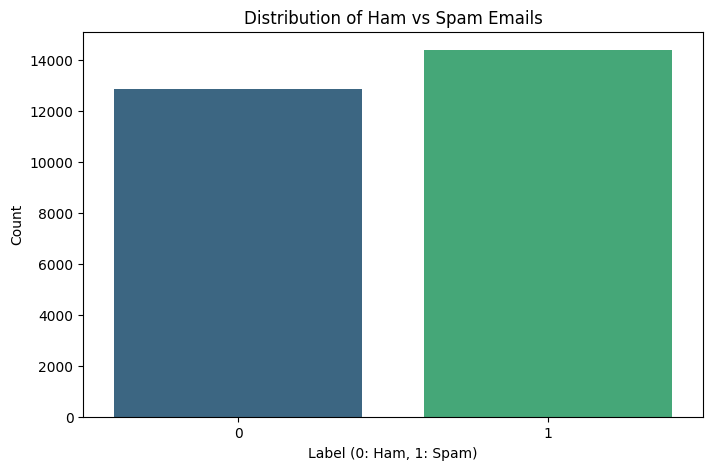

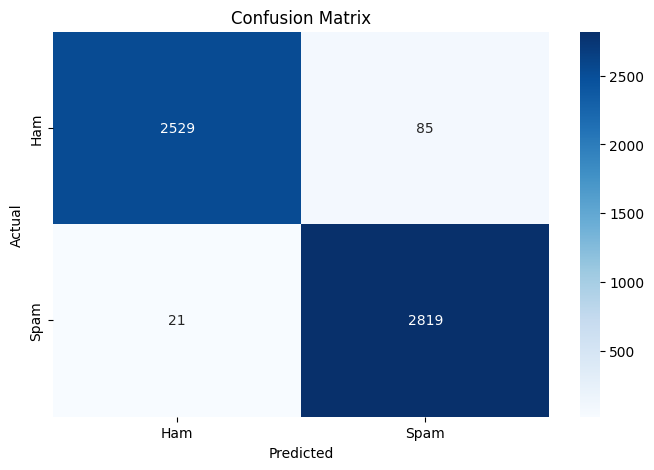

In [ ]:
# Visualization
# Class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Distribution of Ham vs Spam Emails')
plt.xlabel('Label (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Separate Files Without Spam (Ham Emails)
# Create a DataFrame with test emails and their predicted labels
test_predictions = pd.DataFrame({
    'email_text': X_test,
    'predicted_label': y_pred
})
test_predictions['predicted_label'] = test_predictions['predicted_label'].map({0: 'ham', 1: 'spam'})  # Map 0/1 to labels

# Filter to keep only ham emails
ham_emails = test_predictions[test_predictions['predicted_label'] == 'ham'].copy()

# Save ham emails to a CSV file with structure
ham_emails.to_csv('ham_emails.csv', index=False, encoding='utf-8')
print(f"Number of predicted ham emails: {len(ham_emails)}")

# Download the file
files.download('ham_emails.csv')

Number of predicted ham emails: 2550


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>